In [1]:
%config InlineBackend.figure_formats = ["retina"]

In [2]:
import matplotlib.pyplot as plt
import pandas as pd; pd.set_option('display.max_columns', 500)

In [3]:
df = pd.read_stata("~/Downloads/194322-V1/PSIDSHELF_1968_2019_LONG.dta")

### Family size over time

Text(0.5, 1.0, 'Mean family size by year')

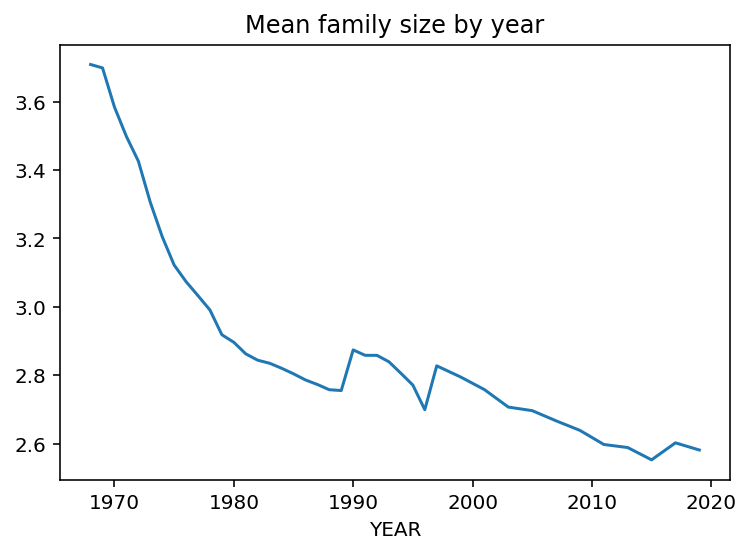

In [73]:
family_sizes_df = df[["YEAR", "FID", "FAMSIZE"]].dropna()
ax = family_sizes_df.groupby(["YEAR", "FID"])["FAMSIZE"].max().groupby("YEAR").mean().plot.line()
ax.set_title("Mean family size by year")

### Inflation-adjusted family income by number of children

In [103]:
family_income_by_size_df = df[["YEAR", "FID", "FAMCHILD", "INCFAMR"]].dropna()
family_income_by_size_df = family_income_by_size_df[
    (family_income_by_size_df["INCFAMR"] != "9,999,997 dollars or more")
    & (family_income_by_size_df["FAMCHILD"] <= 6)
]
family_income_by_size_df["INCFAMR"] = family_income_by_size_df["INCFAMR"].cat.rename_categories({"Zero dollars": "0"}).astype(str).astype(float)
family_income_by_size_df["FAMCHILD"] = family_income_by_size_df["FAMCHILD"].cat.rename_categories({"No children": "0"}).astype(int)

family_incomes_by_year = family_income_by_size_df.groupby(["YEAR", "FID", "FAMCHILD"])["INCFAMR"].max()
median_income_by_family_size_and_year = family_incomes_by_year.groupby(["FAMCHILD", "YEAR"]).median()
median_income_by_family_size_and_year

FAMCHILD  YEAR
0         1968    28011.135576
          1969    31246.084410
          1970    34067.755229
          1971    35776.029904
          1972    37482.557742
                      ...     
6         2011    29162.667983
          2013    38265.776288
          2015    41418.007721
          2017    43667.149374
          2019    47782.834240
Name: INCFAMR, Length: 287, dtype: float64

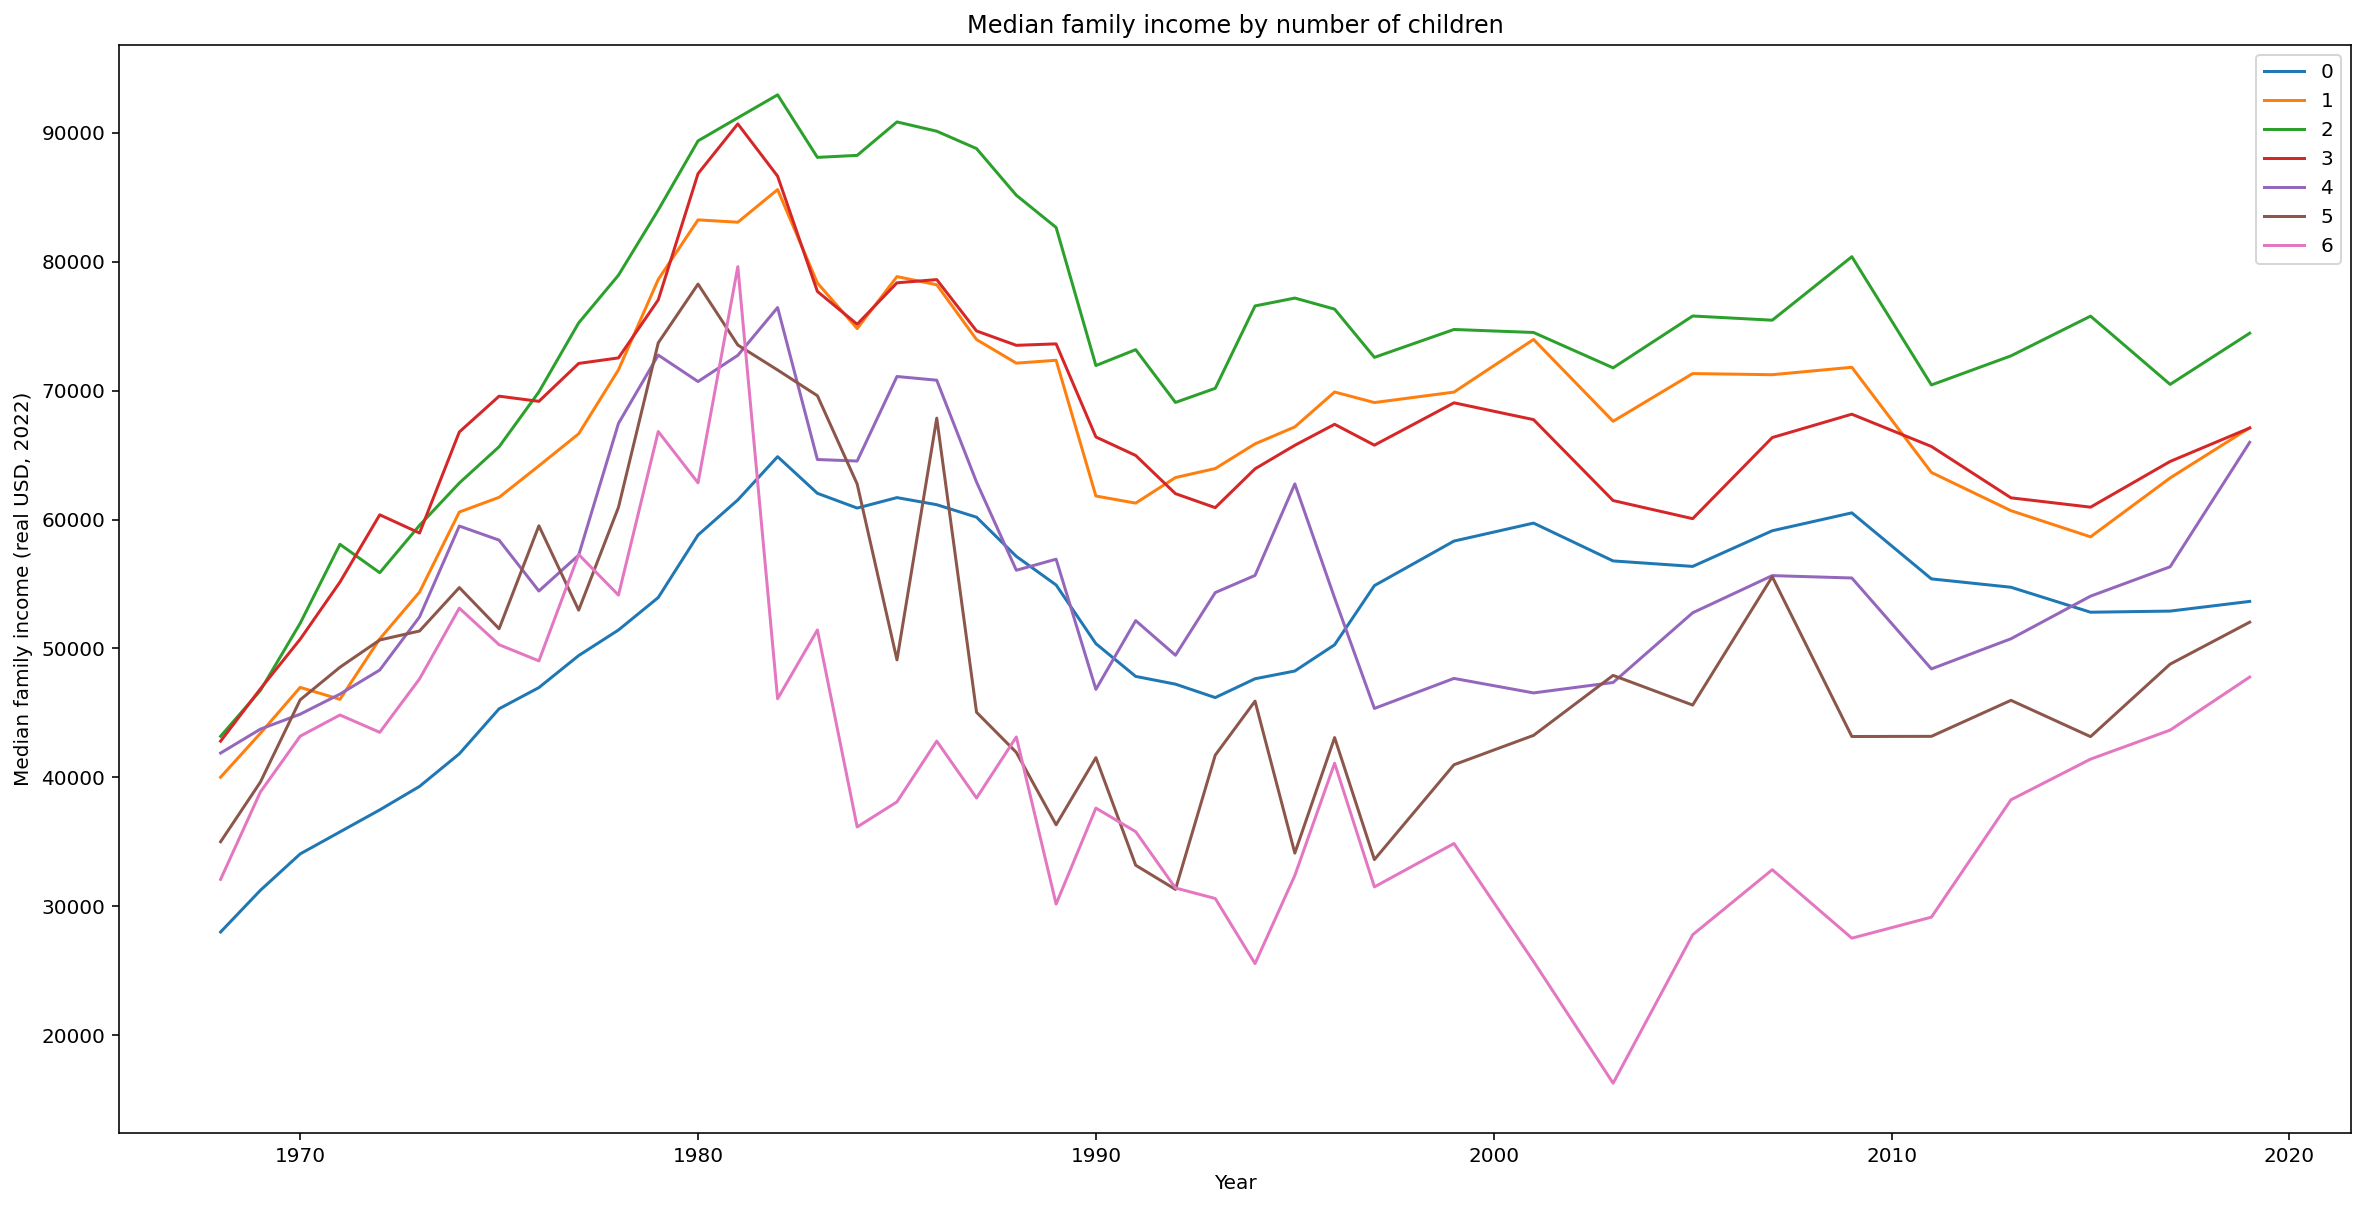

In [105]:
fig, ax = plt.subplots(figsize=(20, 10))
for fam_size, fam_size_income_df in median_income_by_family_size_and_year.groupby(level=0):
    fam_size_income_df.droplevel(0).plot.line(ax=ax, label=str(fam_size))

ax.legend()
ax.set_xlabel("Year")
ax.set_ylabel("Median family income (real USD, 2022)")
ax.set_title("Median family income by number of children")
plt.show()

### Mixed-generation households by region

def: family unit contains someone <65 and someone ≥65

In [178]:
mixed_gen_df = df[
    df["GEOREGION"].isin(["Northeast", "Midwest", "South", "West"])
][["FID", "YEAR", "AGEREP", "GEOREGION"]].dropna()
mixed_gen_df["GEOREGION"] = mixed_gen_df["GEOREGION"].astype(str)

In [191]:
mixed_gen_family_counts = mixed_gen_df.groupby(["YEAR", "FID"]).filter(
    lambda group: (group["AGEREP"].min() < 65) and (group["AGEREP"].max() >= 65)
)[["GEOREGION", "FID", "YEAR"]].drop_duplicates().groupby(["GEOREGION", "YEAR"]).size()
mixed_gen_family_counts

GEOREGION  YEAR
Midwest    1968     67
           1969     77
           1970     72
           1971     71
           1972     66
                  ... 
West       2011     95
           2013    109
           2015    107
           2017    122
           2019    128
Length: 164, dtype: int64

In [192]:
family_counts = mixed_gen_df[["YEAR", "GEOREGION", "FID"]].drop_duplicates().groupby(["GEOREGION", "YEAR"]).size()
family_counts

GEOREGION  YEAR
Midwest    1968    1181
           1969    1133
           1970    1174
           1971    1217
           1972    1280
                   ... 
West       2011    1595
           2013    1598
           2015    1590
           2017    1716
           2019    1671
Length: 164, dtype: int64

In [193]:
pct_mixed_gen_counts = 100 * (mixed_gen_family_counts / family_counts)

Midwest
Northeast
South
West


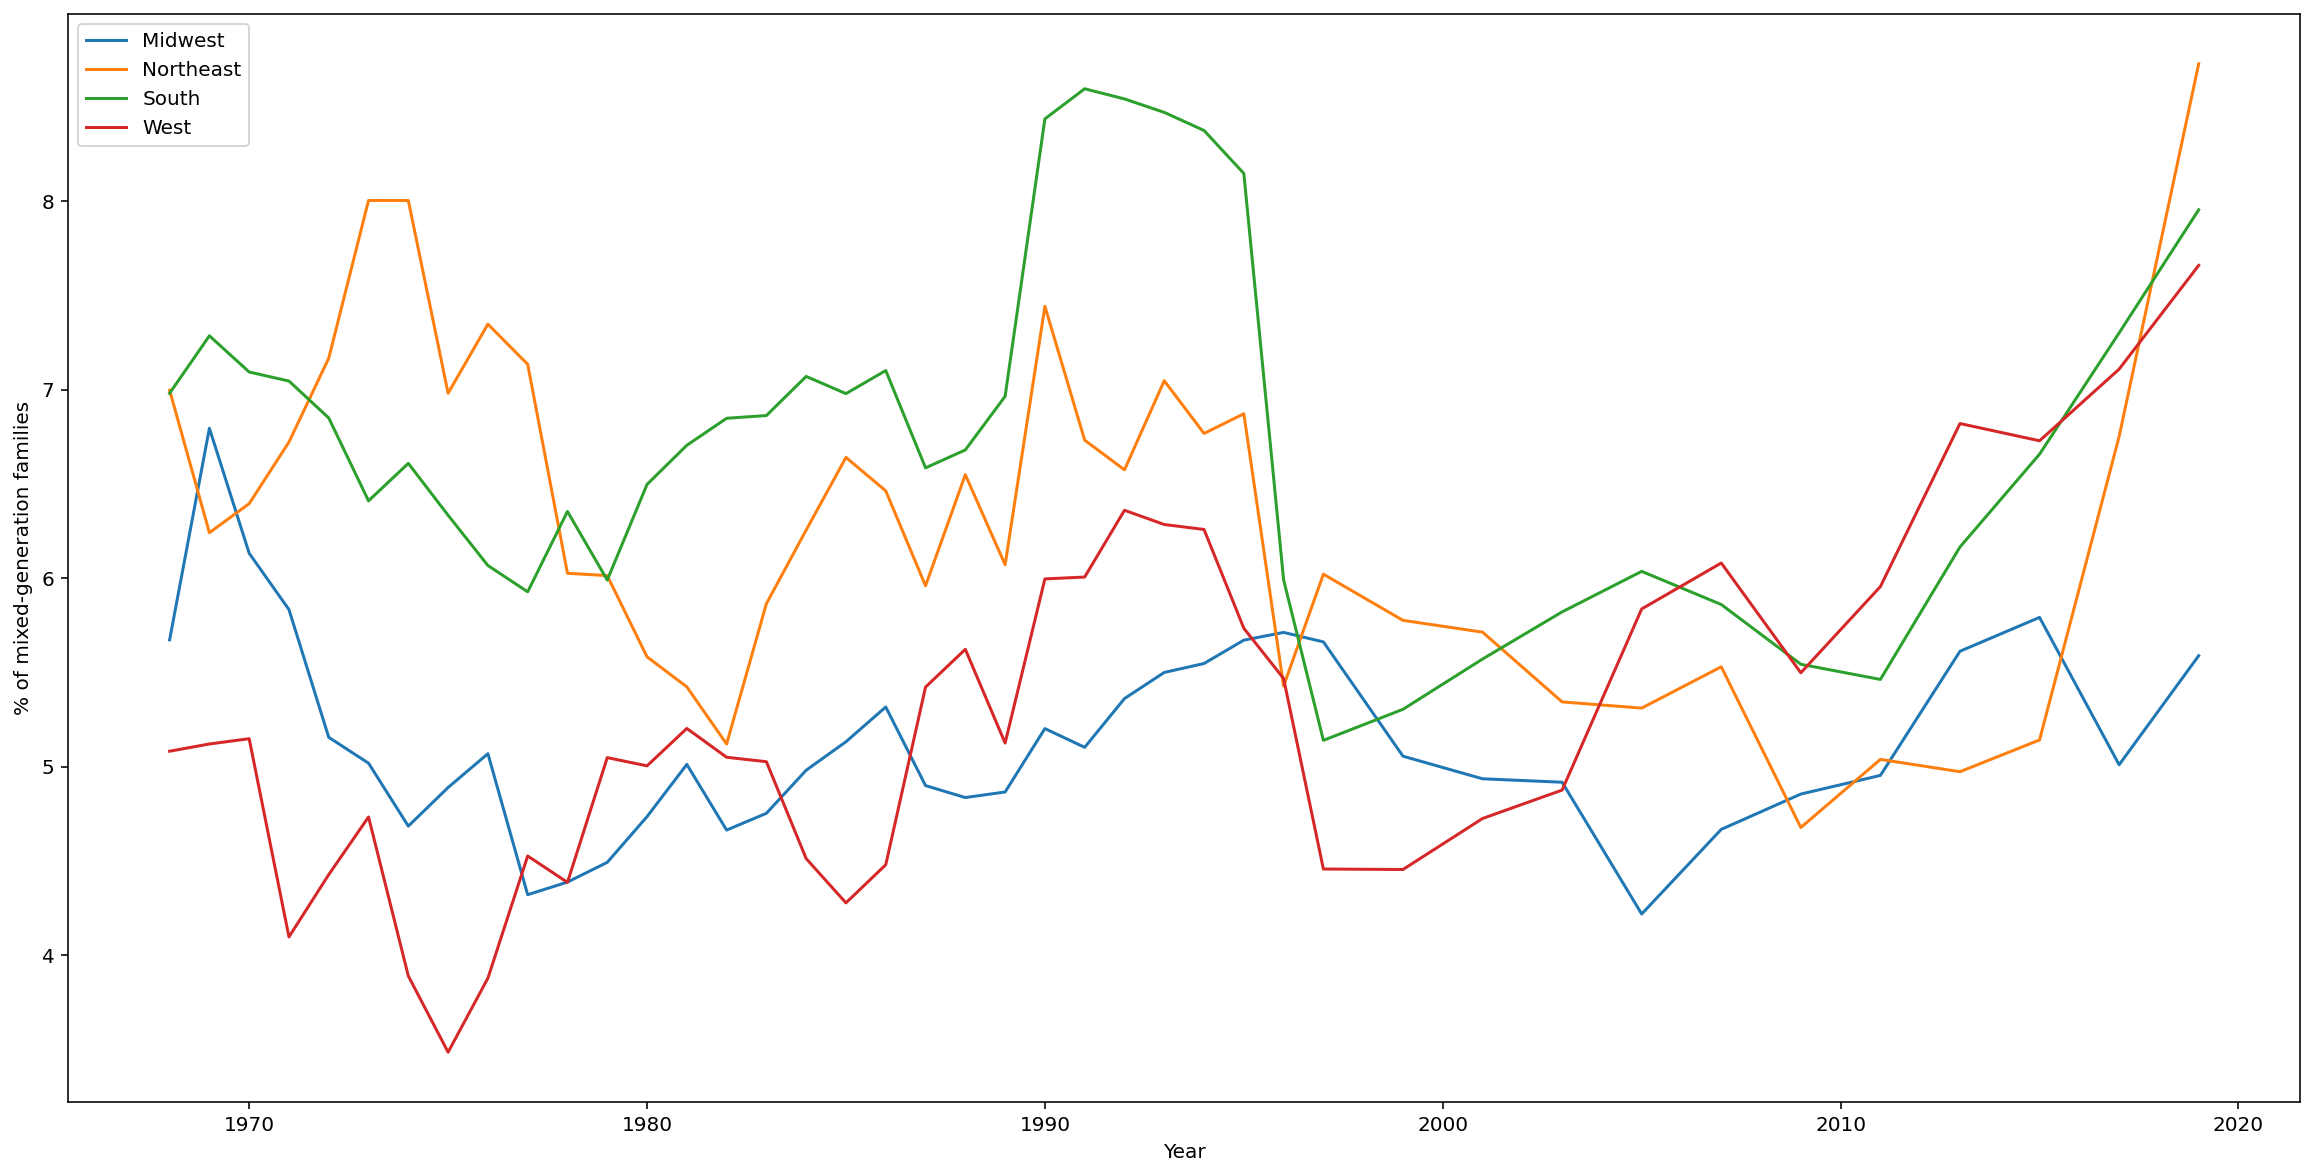

In [194]:
fig, ax = plt.subplots(figsize=(20, 10))
for region, pct_mixed_gen_by_region_counts in pct_mixed_gen_counts.groupby(level=0):
    print(region)    
    pct_mixed_gen_by_region_counts.droplevel(0).plot.line(ax=ax, label=str(region))

ax.legend()
ax.set_xlabel("Year")
ax.set_ylabel("% of mixed-generation families")
#ax.set_title("Median family income by number of children")
plt.show()

### Frequency of same-sex reference couples over time

In [164]:
df["REFCOUPLE"].unique()

['In ref couple (ref person or spouse/partner)', NaN, 'Not in ref couple (not ref person or spouse/p...]
Categories (2, object): ['Not in ref couple (not ref person or spouse/p... < 'In ref couple (ref person or spouse/partner)']

In [195]:
df["SEX"].unique()

['Male', 'Female', NaN]
Categories (2, object): ['Male' < 'Female']

In [169]:
couples_df = df[["YEAR", "ID", "FID", "REFCOUPLE", "SEX"]][df["REFCOUPLE"] == "In ref couple (ref person or spouse/partner)"].dropna()

In [174]:
same_sex_reference_couples_count = couples_df.groupby(["YEAR", "FID"]).filter(
    lambda group: len(group) == 2 and len(group["SEX"].unique()) == 1
)[["YEAR", "FID"]].drop_duplicates().groupby("YEAR").size()

In [175]:
reference_couples_count = couples_df.groupby(["YEAR", "FID"]).filter(
    lambda group: len(group) == 2
)[["YEAR", "FID"]].drop_duplicates().groupby("YEAR").size()

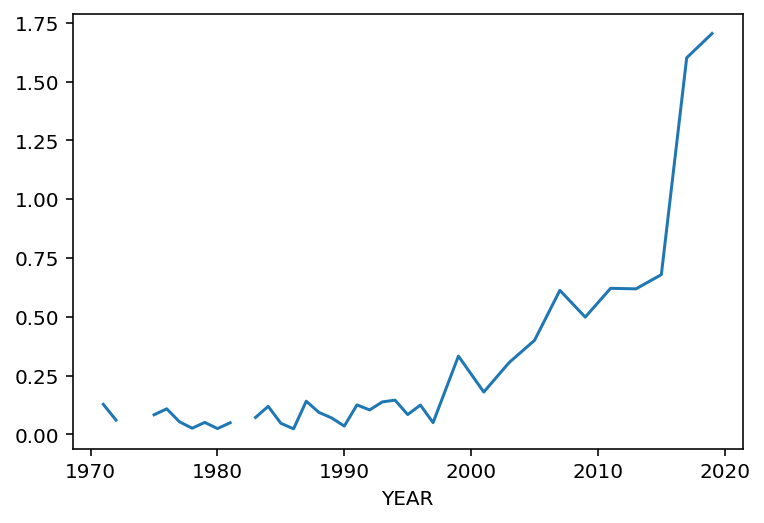

In [196]:
(100 * same_sex_reference_couples_count / reference_couples_count).plot.line()
plt.show()

## (more scratch work)

In [19]:
df["BIRTHYEAR"].min()

1871.0

In [70]:
fam_df = df[df.LINEAGE == 1000].copy()

In [71]:
len(df.LINEAGE.unique())

8102

In [72]:
fam_df["EARNINDR"]

452394    114331.165617
452395    118735.120756
452396    120610.244547
452397    110042.470654
452398    120823.781906
              ...      
453209              NaN
453210              NaN
453211              NaN
453212              NaN
453213              NaN
Name: EARNINDR, Length: 820, dtype: category
Categories (86305, object): ['Zero dollars' < 1.0 < 1.403434 < 1.624779 ... 6038448.779104 < 6854327.116248 < 7664835.006234 < 9999999.0]

In [73]:
incomes_df = fam_df[~pd.isna(fam_df["EARNINDR"])][["ID", "YEAR", "EARNINDR"]]
incomes_df["EARNINDR"] = incomes_df["EARNINDR"].cat.rename_categories({"Zero dollars": "0"}).astype(float)

In [74]:
incomes_df

,ID,YEAR,EARNINDR
452394,1000001.0,1968,114331.165617
452395,1000001.0,1969,118735.120756
452396,1000001.0,1970,120610.244547
452397,1000001.0,1971,110042.470654
452398,1000001.0,1972,120823.781906
...,...,...,...
453130,1000176.0,2017,87133.890798
453131,1000176.0,2019,80474.997036
453170,1000177.0,2015,34505.421595
453171,1000177.0,2017,32675.209049


len(incomes_df["ID"].unique())

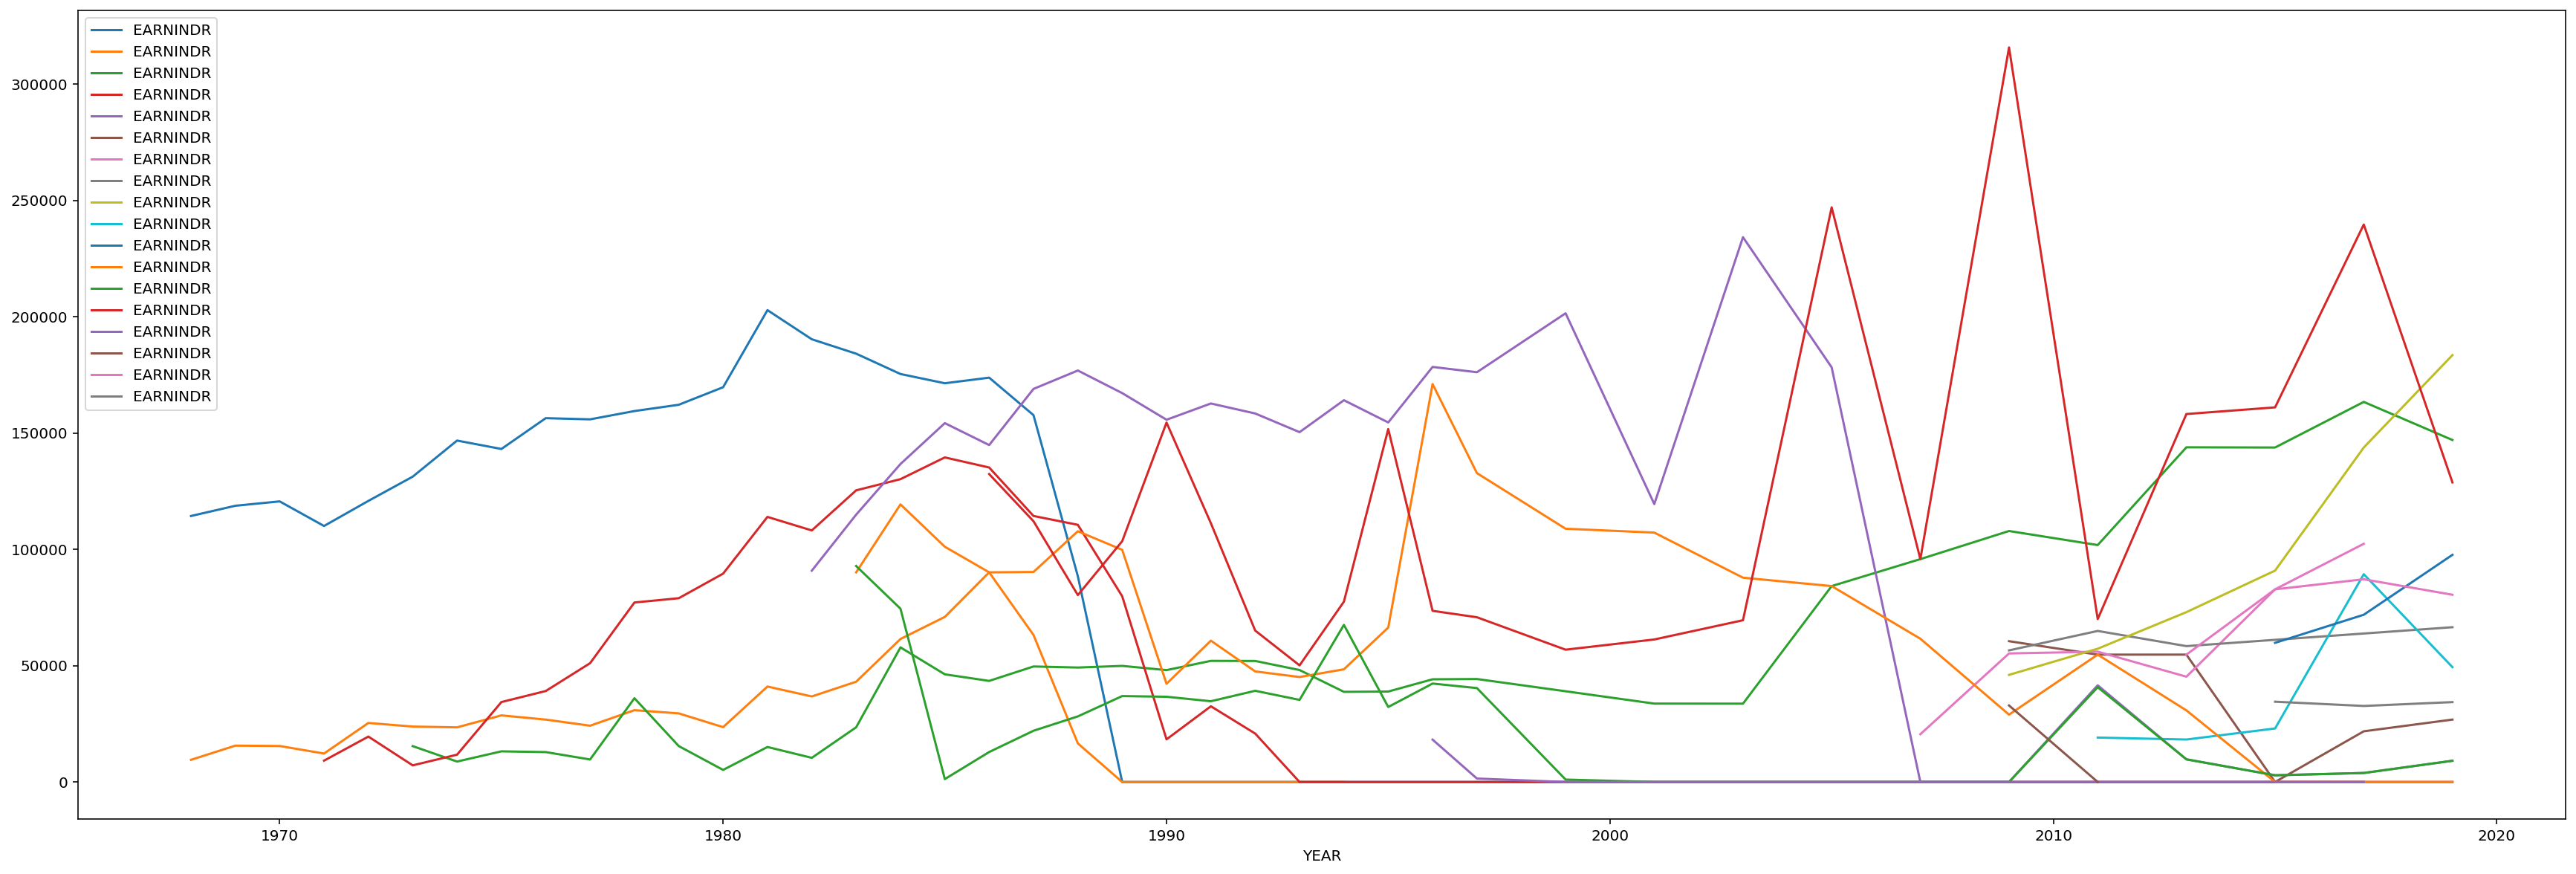

In [78]:
fig, ax = plt.subplots(figsize=(30, 10))

for person_id in incomes_df["ID"].unique():
    incomes_df[incomes_df["ID"] == person_id].plot.line(x="YEAR", y="EARNINDR", ax=ax)
    #ax.set_title(f"ID = {int(person_id)}")
plt.show()

can potentially generate a timeline of events rooted in a head of household with some time series superimposed:
* marriage(s), divorce(s)
* childbirths
* retirement
* death, obviously
* splitting into new households (children move out, go to college, etc.)s